Todo : 
- Pass the plot in the  MAIN
- For all plot, plot the mean over all the Attempts
- plot epsi in the velocities plot
- Re RUN C:\Users\maxim\Documents\3A\BIC\BIC-coursework\Results\Convergence Tuning\Tune_InertiaVSsocial_M_2025_11_17_09_22_51 on 10 attempts


# Report


In that part, the prediction improvement in seeked only through the PSO tuning without any modification on the ANN model. 
One could assume that improving the ANN and the PSO independantly may enhance the whole PSO+ANN when combining the best-performing configurations. 

# Literrature Review

Litterature standards results : 


# Indicators

The relative improvement as inspired from [Sengputa] : 

          ki  =  (fx - fxpbest) / (fx + fxpbest)

Since our fitness function is -MAE (< 0), a particle will diverge from its previous best solution if and only if ki -> 1 .


# Metrics 


The highest uncertainty : [to source]


# Vanilla PSO



## The Vanilla configuration

Fitness function : -MAE

Parameters : 
ANNStructure = [8,'input',5,"sigmoid",1,'linear']
swarmsize = 10
alpha = 1 # inertia # 
beta  = 1 # local
gamma = 1 # informant
delta = 1 # global #when 0 : no evolution
epsi  = 0.5

After a first informants-free test, we will be conduct a similar experiment with 5 informants to compare 
the very preliminary impact of the social term in our model-starter. 

informants_number = 0
Informants = randomParticleSet

max_iteration_number = 1000
AttemptNumber = 10

# ////////////// Params to increment //////////////////////
max_iteration_numberList = [100]
swarmsizeList = [10]

Randomness : 
    np.random.randn for the position initialisation (standard normal distribution)  https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
    np.randopm.random for the update of the velocity (uniform distribution)         https://docs.python.org/3/library/random.html

## Indicators and graphs 




## Results : 

### Without informants 

Swarm 10, 1000 iterations : Simu ID : VanillaPSOBenchmark1_M_2025_11_16_05_15_13 (Results/VanillaPSO/Bench1/VanillaPSOBenchmark1_M_2025_11_16_05_15_13/results.xlsx)


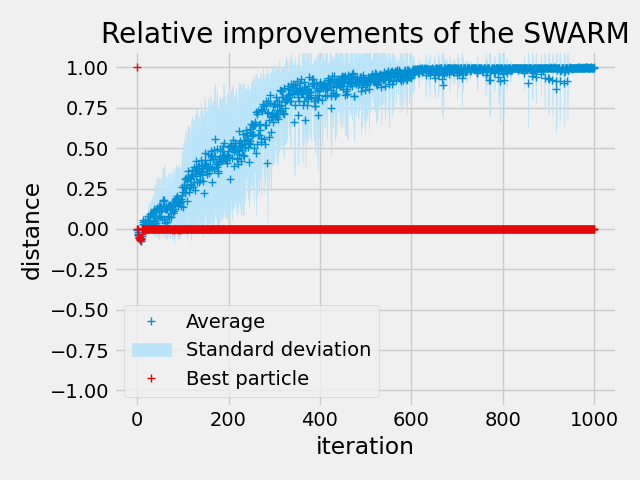

For 10,100,1000 iterations

|best_fitness_avg |	MAE_train avg |	MAE_train std	|MAE_test avg	|MAE_test std |
_________________|________________|_________________|_______________|______________|

|-15,03178855	 |   15,03178855	|        2,275042353	|    14,53849037|  2,090703343 |

|-11,68511863	11,68511863	        0,758899909	    11,73554125	    0,640350101 |

-9,878046444	9,878046444	        1,205297883	    9,789004918	    1,179980776




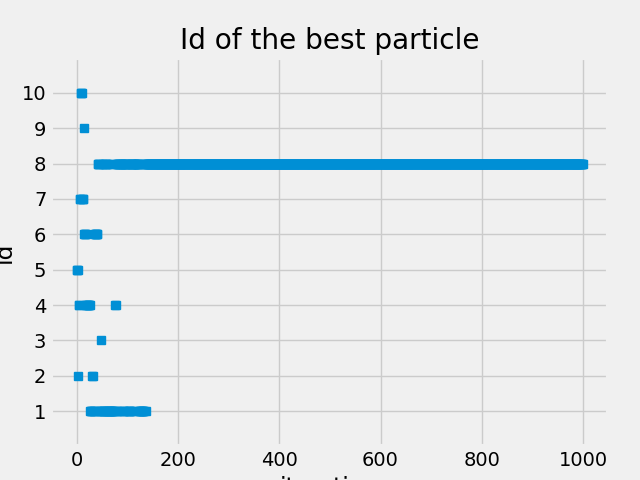
The first thing that is strinking is that from ... the best particle remains the same. The figure XX shows the  early quasi lethargic state of the SWARM. 
No particle seems to improve from a certain point. We would need to regenerate them....
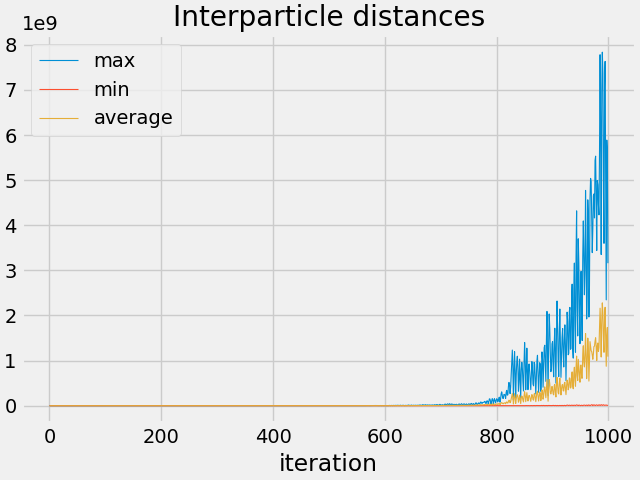

Aditionally, let us note that the particles are diverging each one from another : the interdistances are booming. And also diverging from their best position ?? 

Incidentally, the sigmoid function encounters overflow due to the 'explosion' of the systema. 


Let'us first solve the converge issue by tuning the dynamics coefficients. 
Then, we will be able to extend more overcome the stalemate by reinitialising the hopeless particles. 
We will also study the impact of the random distributions on the performances



#### Swarm 100, 1000 iterations : Useless since the PSO diverges

[]Save the graphs


### With 5 informants 


# Swarm 10, 1000 iterations : 

[text](Results/VanillaPSO/Bench2/VanillaPSOBenchmark1_M_2025_11_16_06_17_22/results.xlsx)

For 10,100,1000 iterations
MAE_train avg	MAE_train std	MAE_test avg	MAE_test std
13,90033176	1,048117404	13,58023754	0,915434949
12,0262232	0,617696755	11,92043016	0,580400584
10,29523003	1,01703036	10,27174221	0,863406938



#### Swarm 100, 1000 iterations : Useless since the PSO diverges

[]Save the graphs


Impacts of a dataset ~normalisation ?


A few tuning to achieve convergence :

![Velocity components.png](<attachment:Velocity components.png>)
According to the graph, the particles might have to much inertia so they cannot really converge. 

Let'us dampen the inertial components : alpha from 1 to 0.5
To improve the convergence we can try to strenghten the attractors (the best solution, the best )
[text](Results/LowerInertia05_M_2025_11_16_11_41_30/results.xlsx)

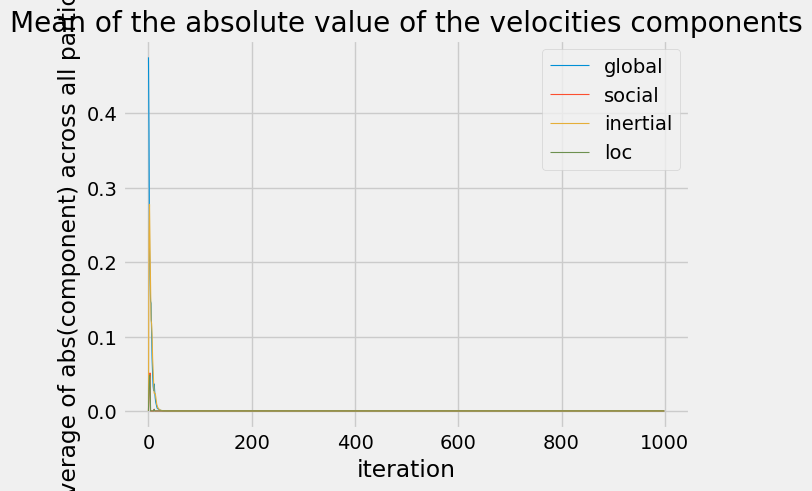 ![télécharger (3).png](<attachment:télécharger (3).png>)
Our SWARM converges however this time the actractiveness of the best global solution in predominent, indeed all the particles converge to that point. 
average MAE : 30,76004929 ; std : 1,873992241. Yet, the ratio intertia / social / global might not allow the particles to explore as the High resulting MAE could be interpreted. 

We need the reduce the weight of the attractors in the formula. 
For instance let us take delta = 0.3 instead of 1.


delta = 0.3 and alpha = 0.8
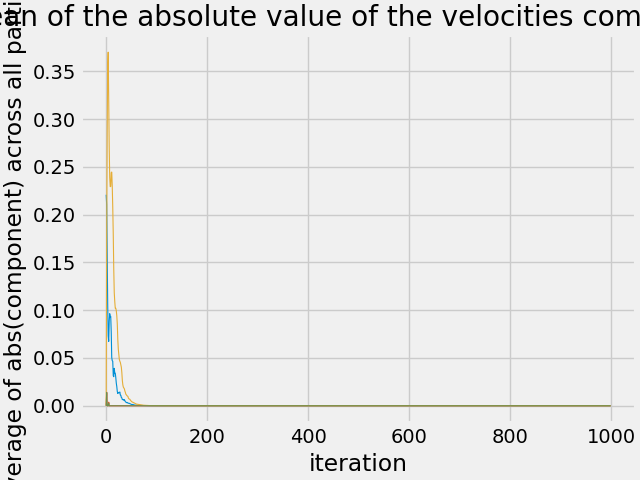



We have an issue with the convergence. 

Recall us a good convergence criterai [Sengputa] 
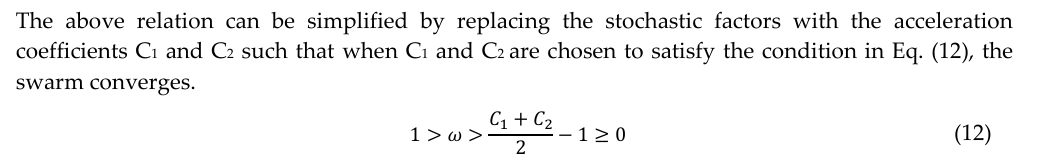

C:\Users\maxim\Documents\3A\BIC\BIC-coursework\Results\Convergence Tuning\SocialVsIntertiaConvergenceTuning_M_2025_11_17_10_07_48

MAE_train avg	MAE_train std	MAE_test avg	MAE_test std
6,898381806	0,659411016	7,006603261	0,625937071

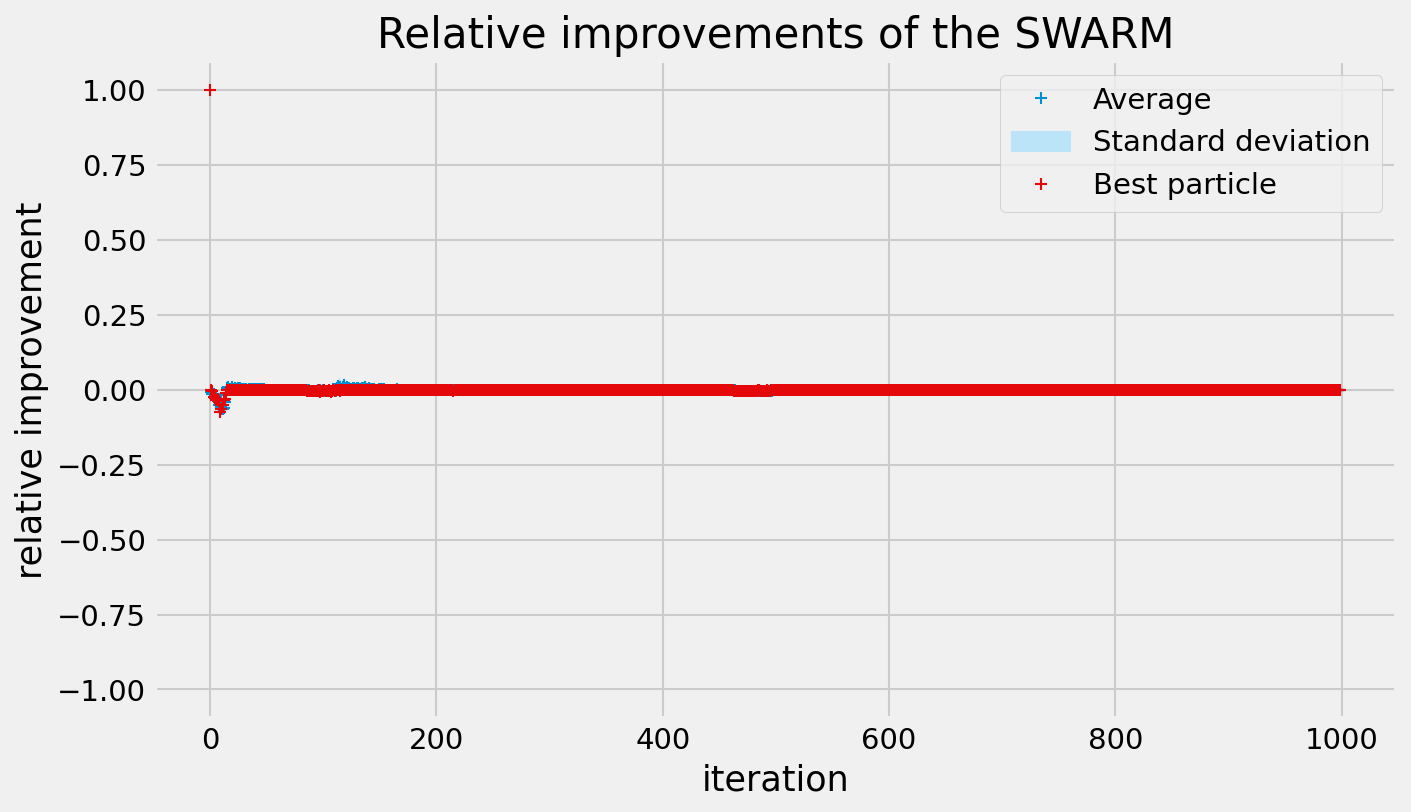

Still the SWARM get quickly stucked. The particle Might be too much attracted by the Best solution (see the distances -> 0 ). 

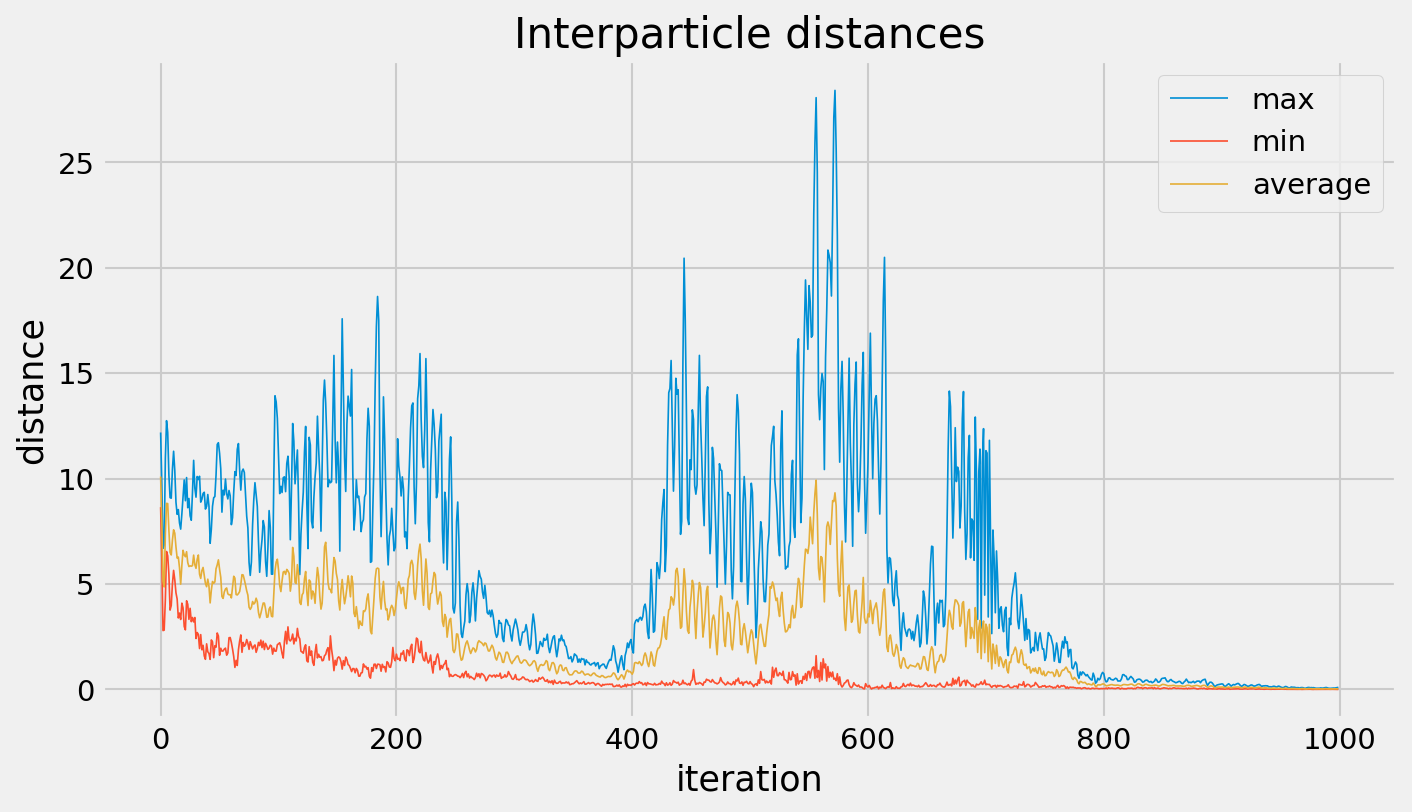
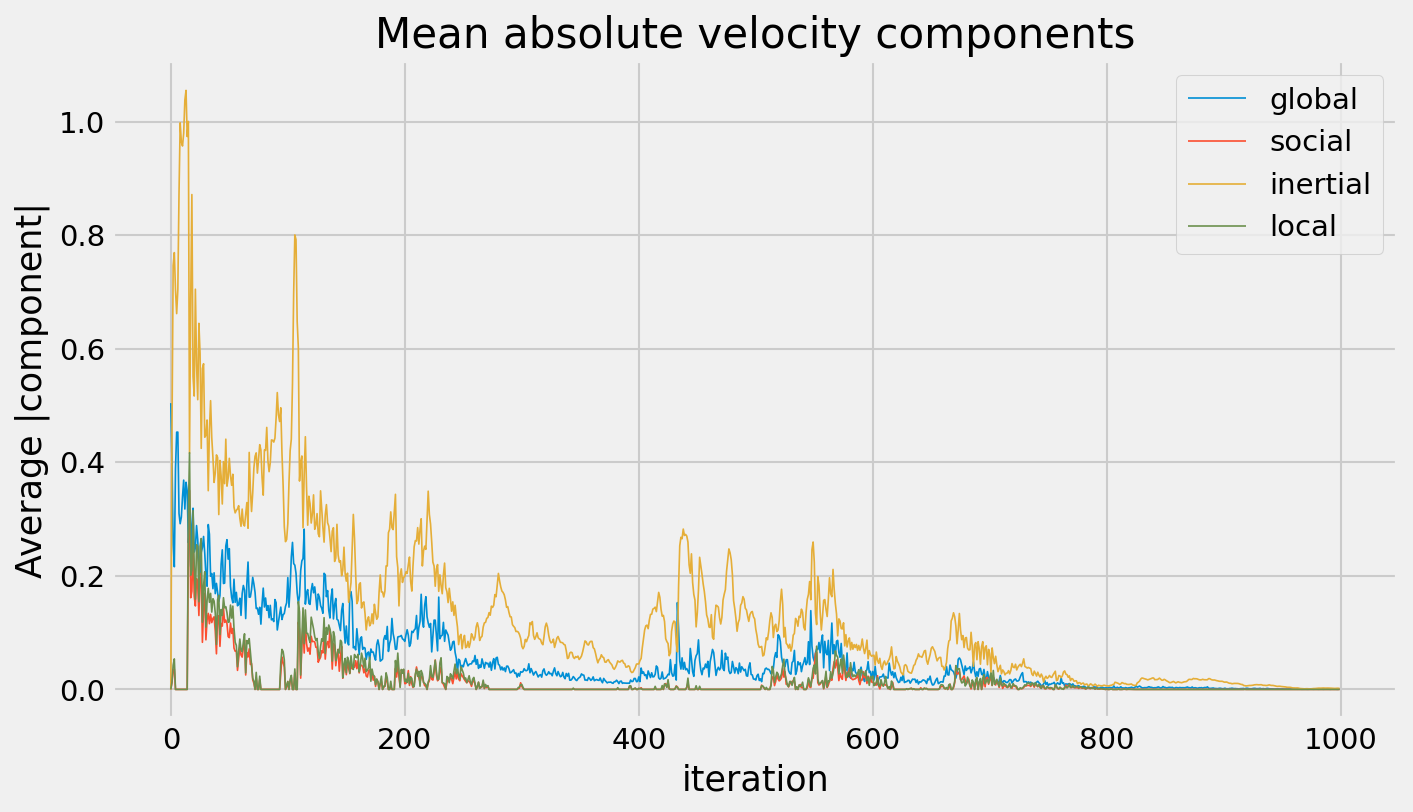
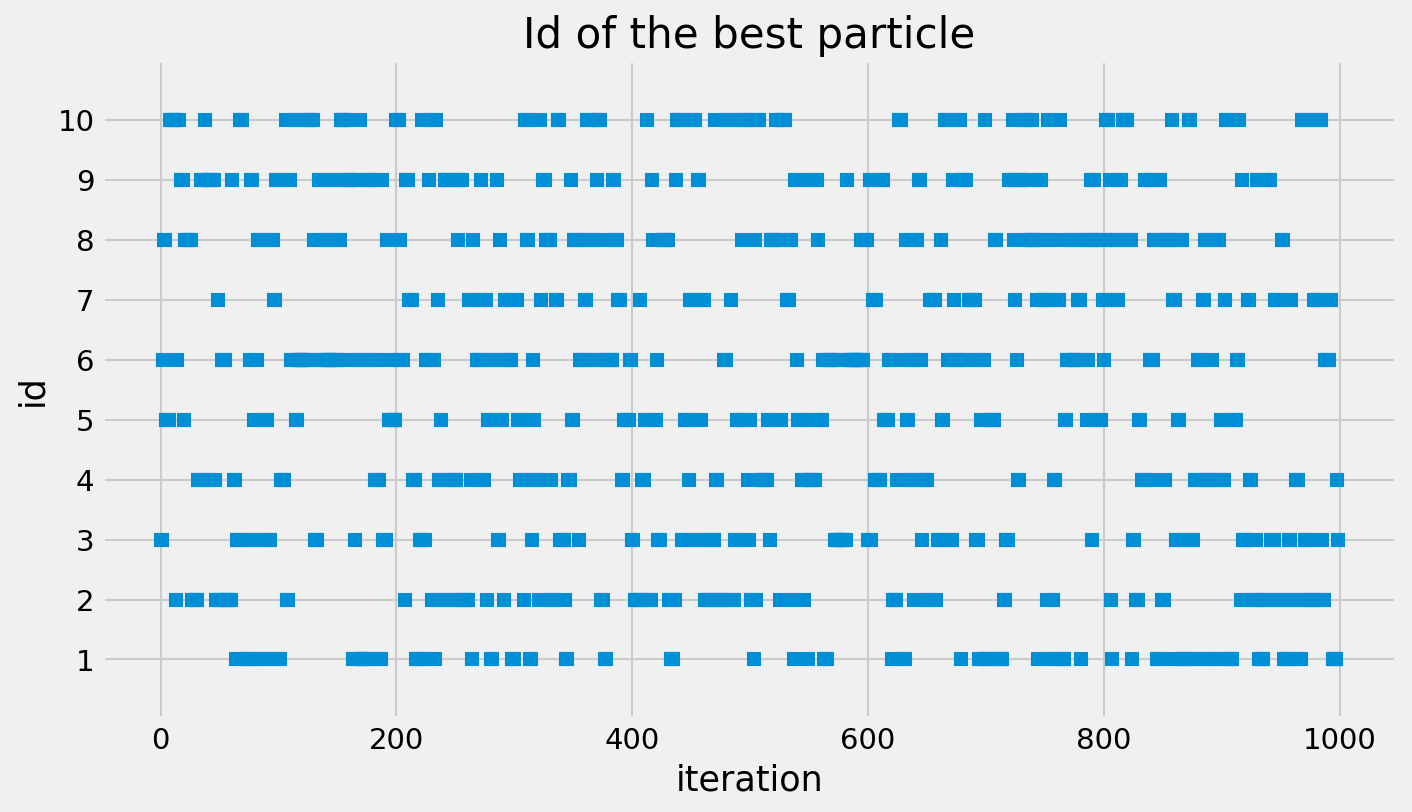

However, let'us contrast by noting that the Best solution holder keep on changing. I means that at least the particles attracted to the Best contribute on enhancing the overall result. 
Finally, it seems pertinent to constitute a group of particles to help the Best particle holder in the supposedly best solution area to afiner. That is the role of the informants of the best particle holder.  
One group to help the best and the rest to explore more. 
Hence, we need to first change the stratedy : let us select the k nearest neigboors, PLus we need to reduce the number of informants. Before one particle had a huge probility to be informed by the BEST. We need to a finest picking of the informants. 
We need to rebalance the informants attractive effect so that we could still have partic

Let us see what happens over one attempt
C:\Users\maxim\Documents\3A\BIC\BIC-coursework\Results\Convergence Tuning\kNN5_Eq12Convergence_M_2025_11_17_11_06_22
MAE_train avg	MAE_train std	MAE_test avg	MAE_test std
6,168058528     	 0	         6,645198679	         0


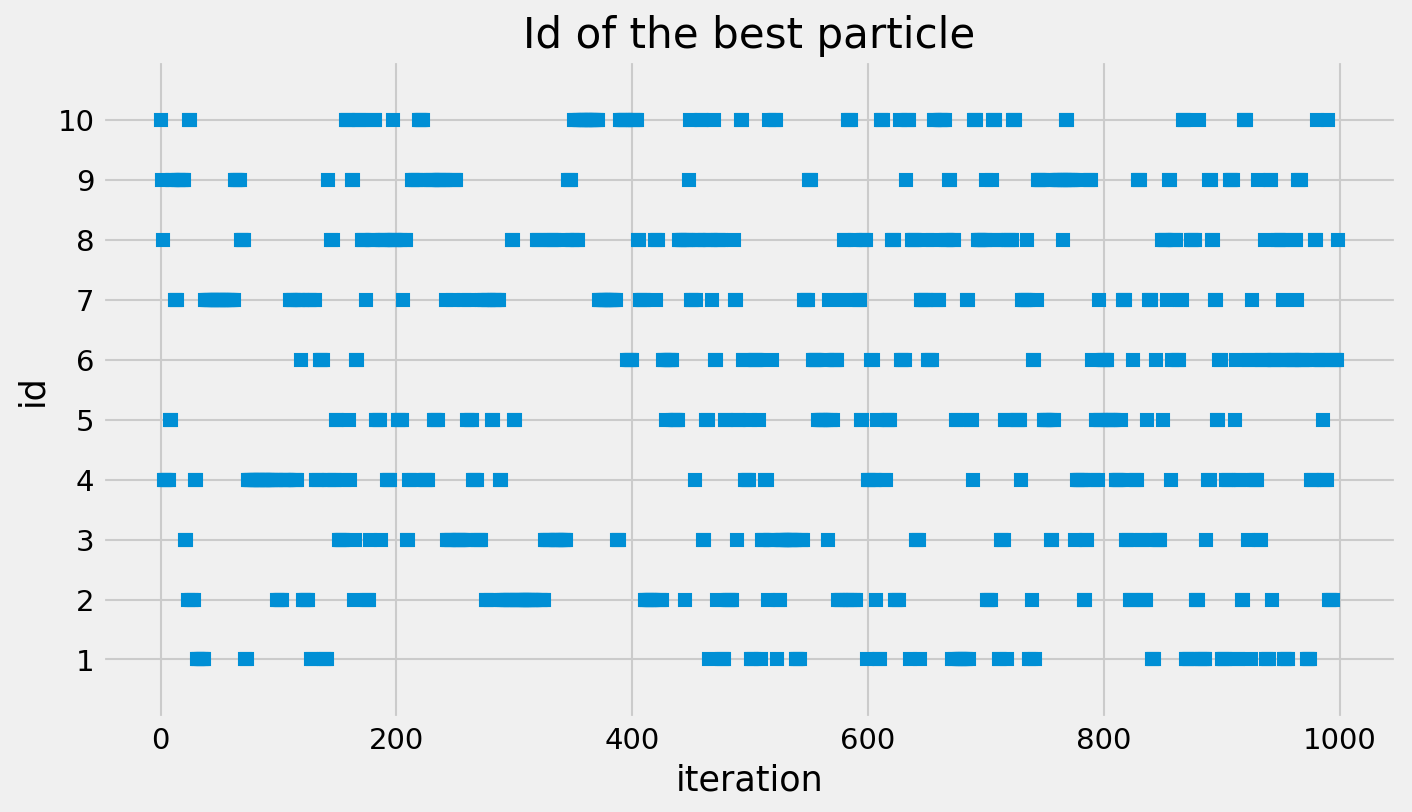
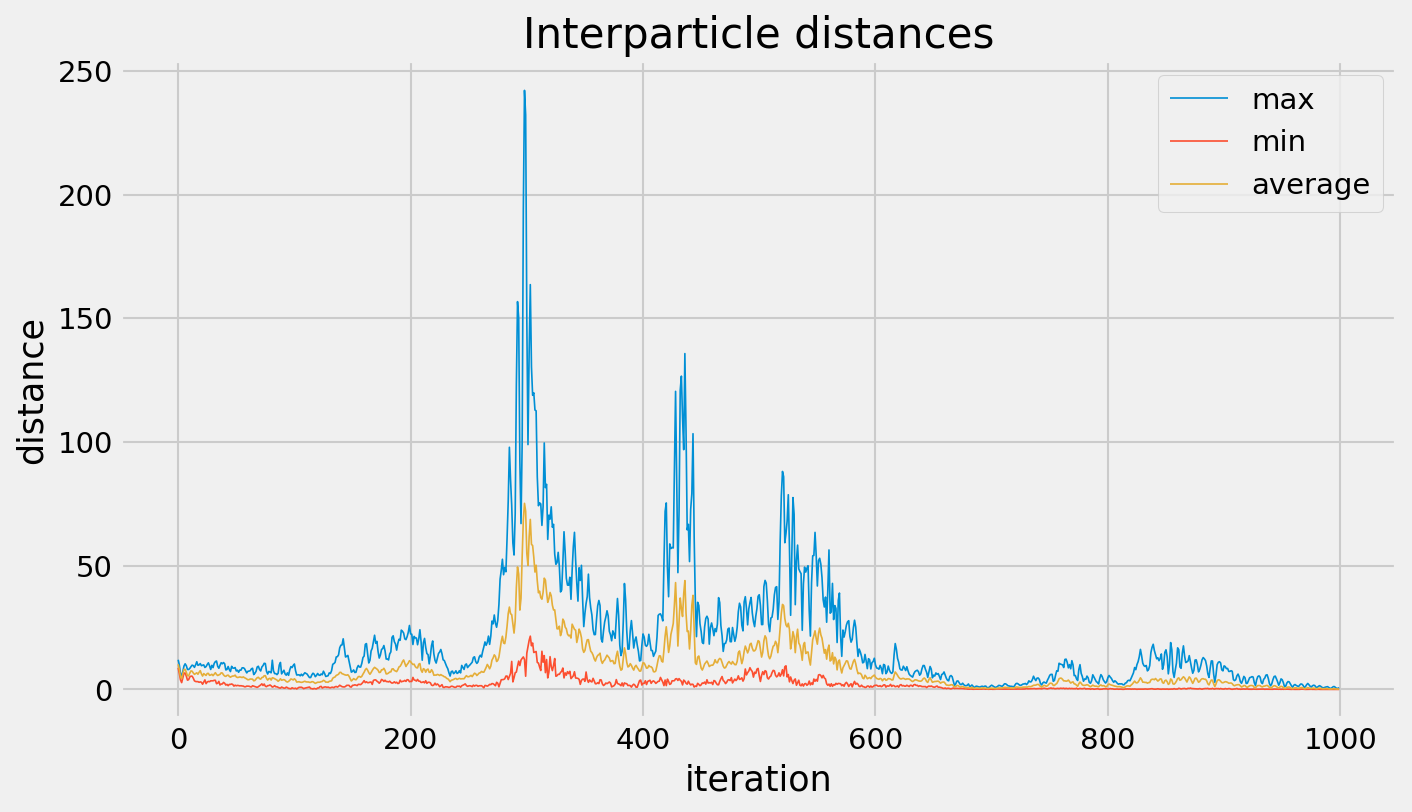

As we can see, there is 3 peak in the interdistances graphs. The global convergence to the best has been delayed which is relevant since we can see that during this peak all the particles seems to still contributes to the global improvement. 
Not necessarly better than the last try.

Need to extend the swarmsize to delay even more the final convergence. 
C:\Users\maxim\Documents\3A\BIC\BIC-coursework\Results\Convergence Tuning\kNN5_SW20_Eq12Convergence_M_2025_11_17_11_16_17

MAE_train avg	MAE_train std	MAE_test avg	MAE_test std
5,774234567     	0	         6,064346241	      0

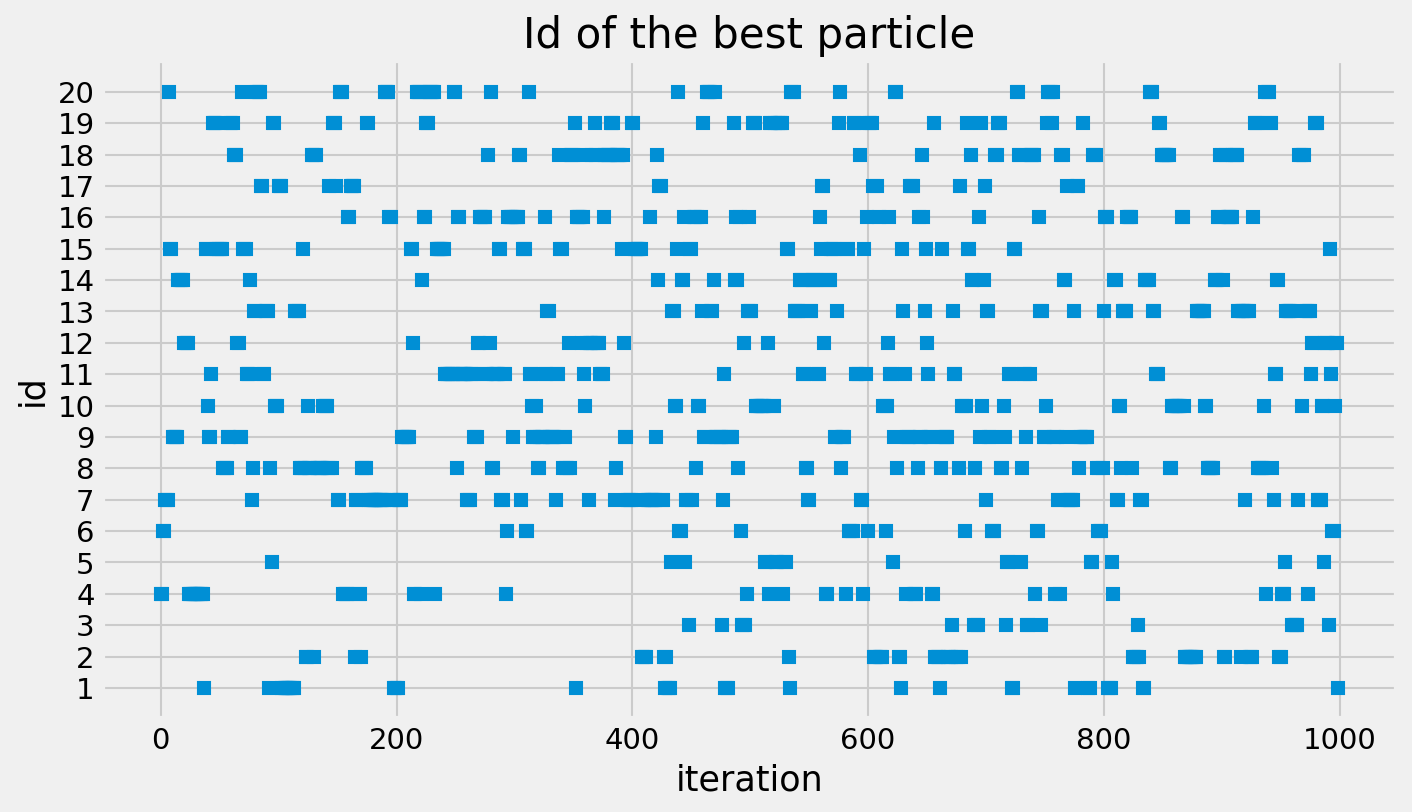
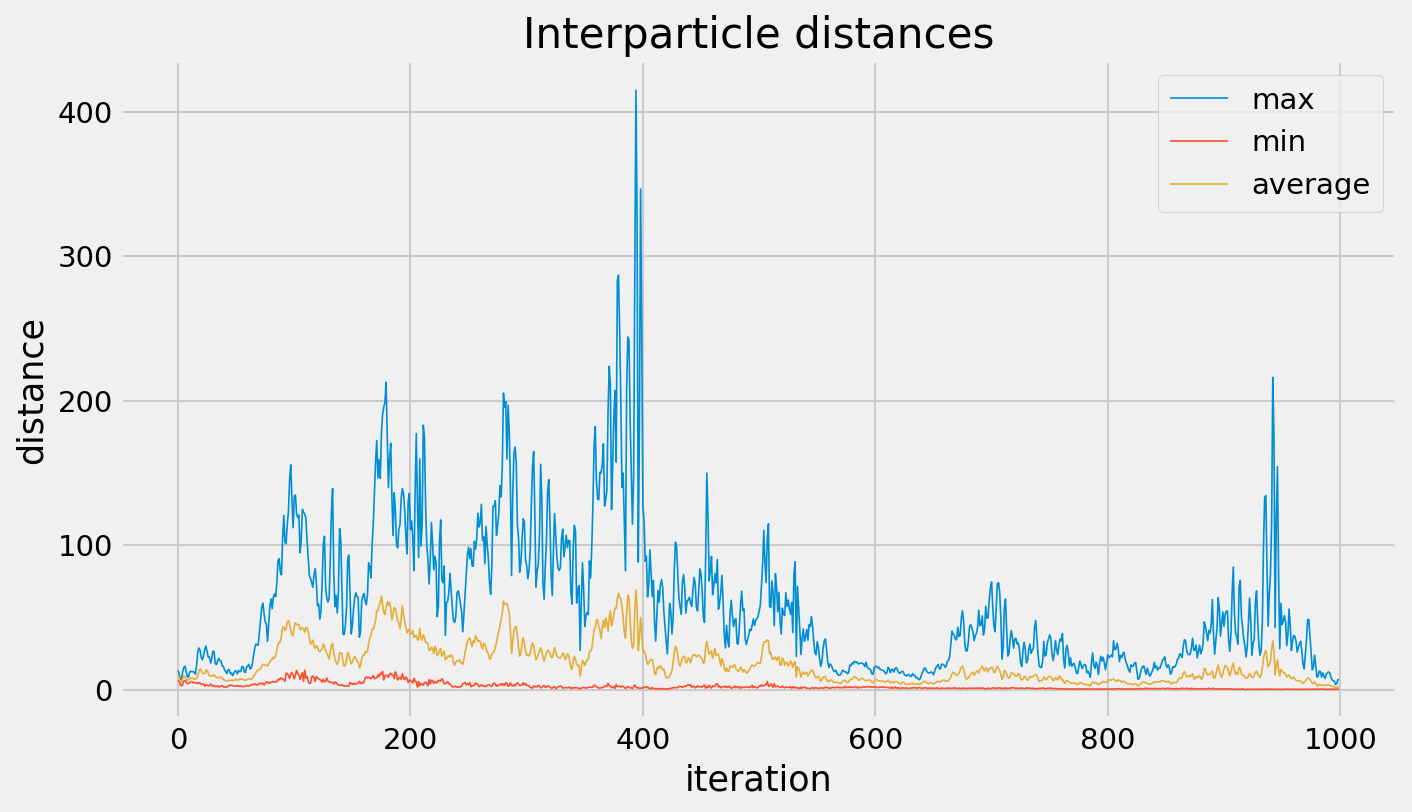
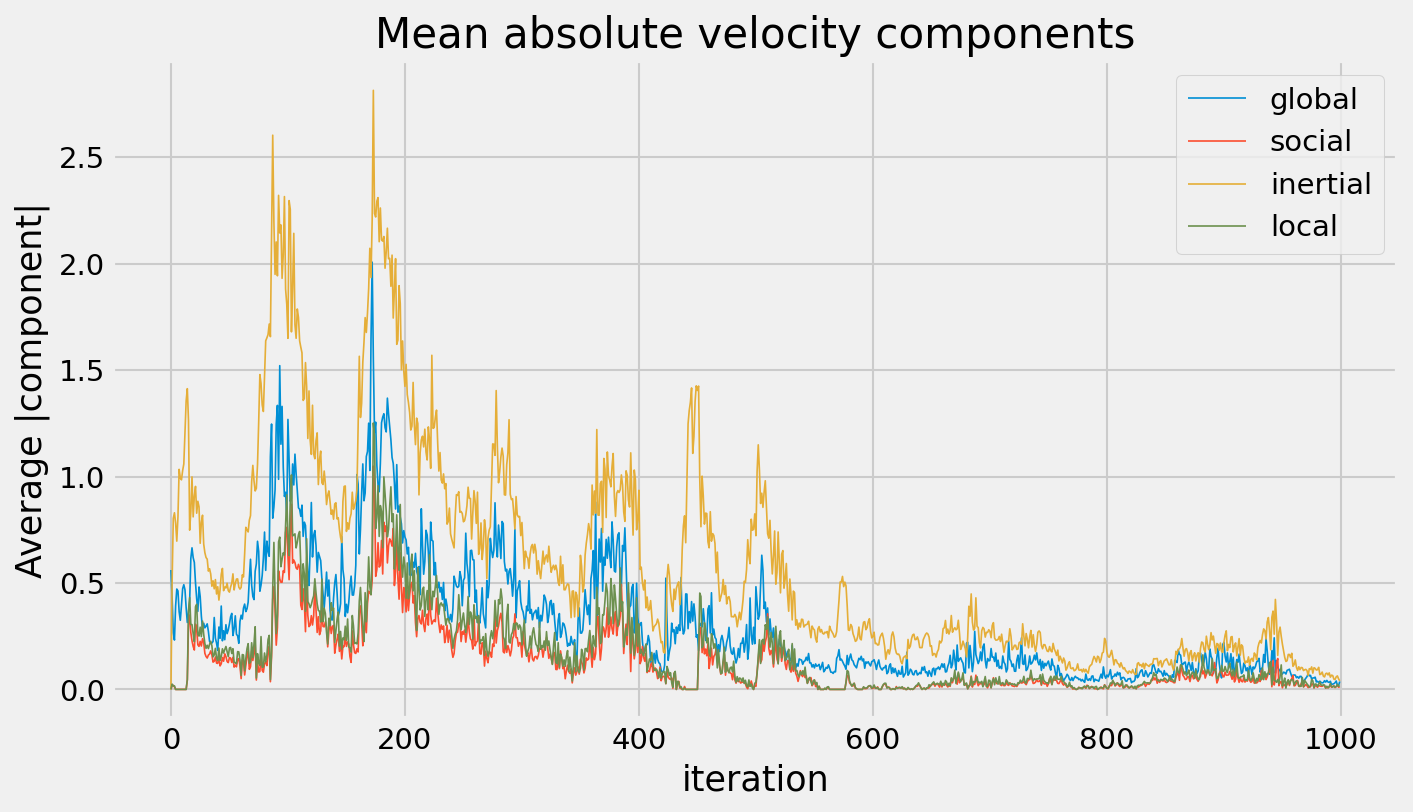

THe mean interparticle distance seems more constant

Better but efficiency rearding the number of iterations and particles ? 
We start to have particles that do not contribute anymore
BUT the relative improvement seems VERY low


To enhance exploration let us realocate some of the best solultion influence to the close informants of the particles.Because social is always inferior to the global influence 

C:\Users\maxim\Documents\3A\BIC\BIC-coursework\Results\Convergence Tuning\kNN5_SW20_Normal_InfoOverGlob_Eq12Convergence_M_2025_11_17_14_31_40

 gamma = 1-> 1.8 # informant
    delta = 1-> 0.2 # global #when 0 : no evolution

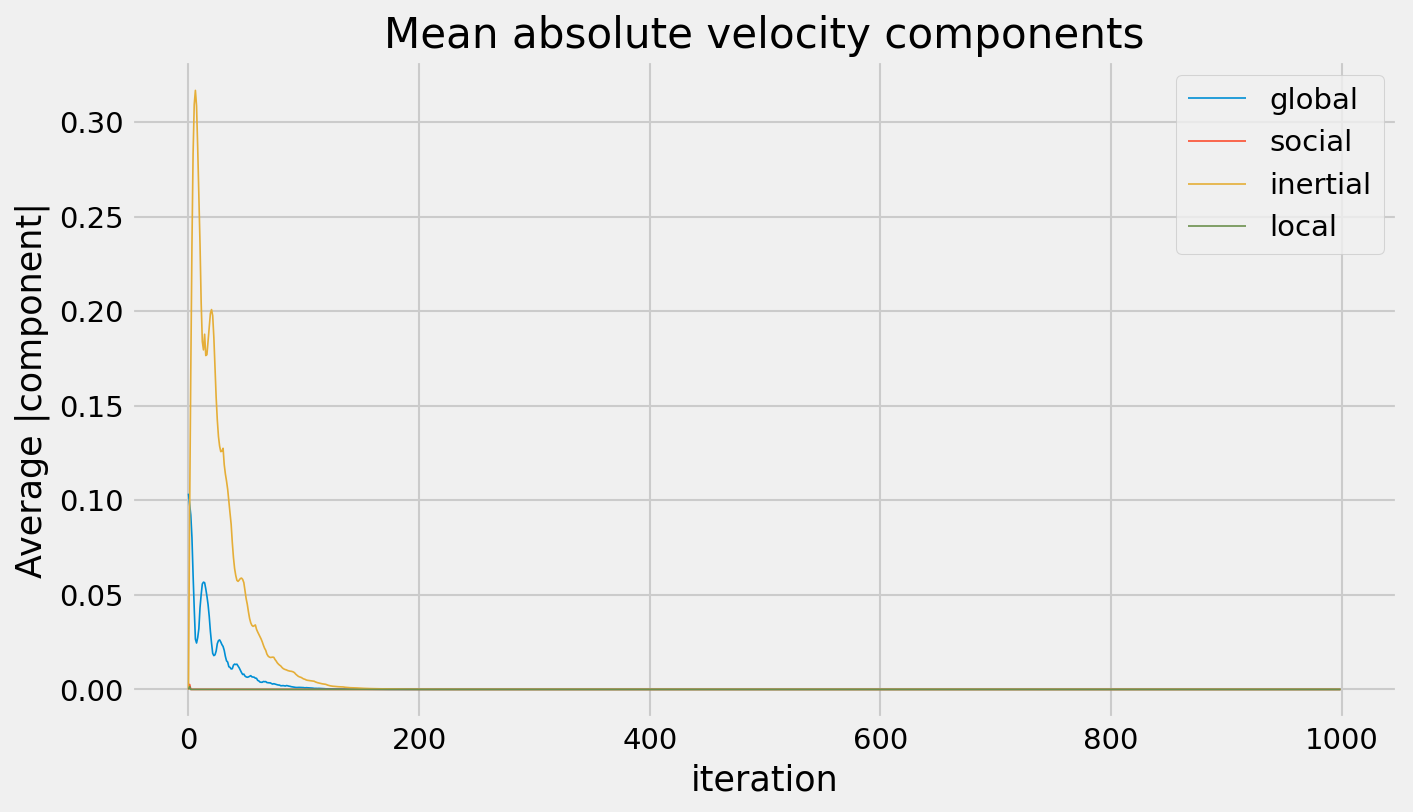 # the social component vanished???

The whole SWARM converges to fast. 




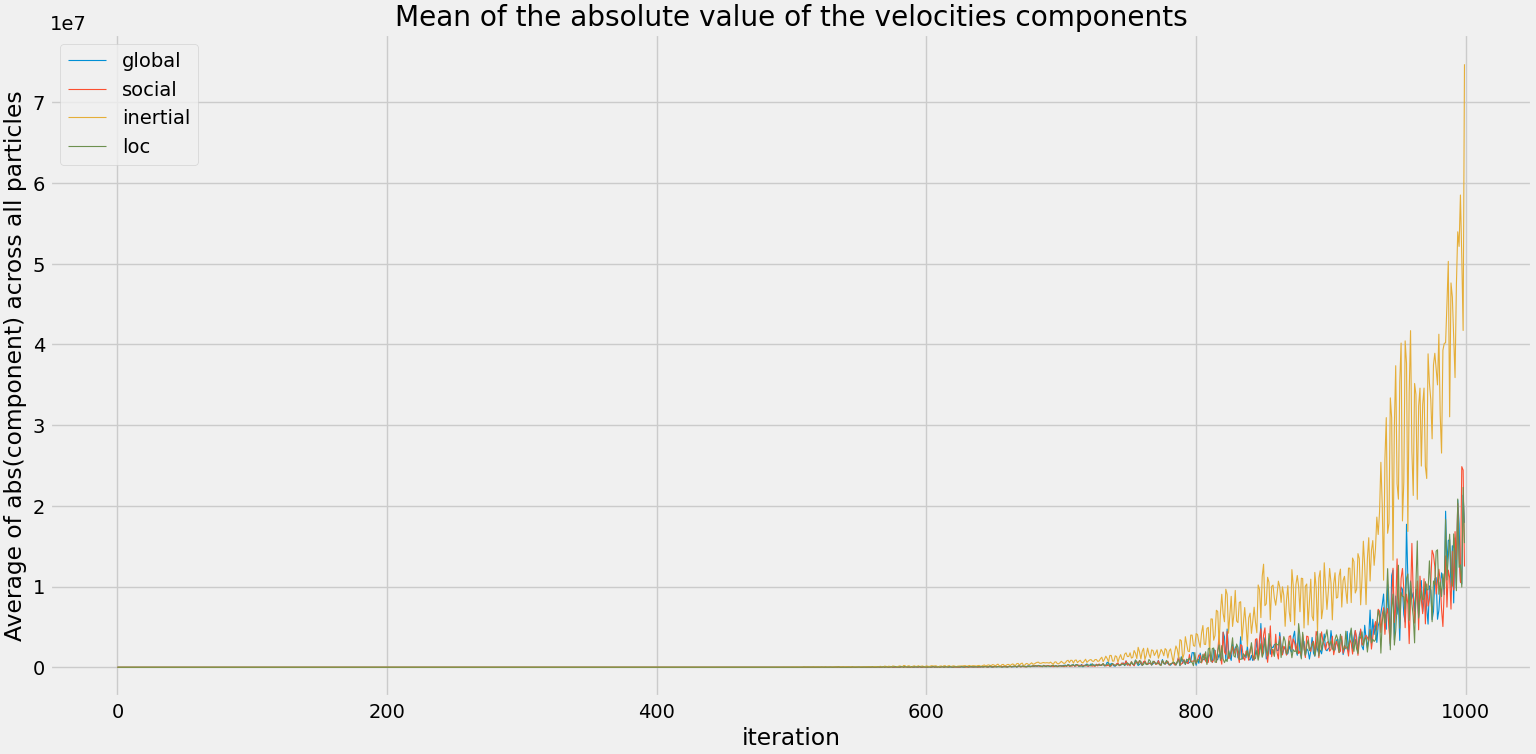

After many tuning attemps we still have a precoce convergence issue. Let us reallocate the particles is they rare not promisiting